In [ ]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d breast-cancer

In [ ]:
!unzip /content/breast-cancer.zip

Streaming output truncated to the last 5000 lines.
  inflating: Breast Cancer Dataset/Augmented Dataset/Non-Cancer/IMG (362)_PerspectiveTransform.jpg  
  inflating: Breast Cancer Dataset/Augmented Dataset/Non-Cancer/IMG (362)_PiecewiseAffine.jpg  
  inflating: Breast Cancer Dataset/Augmented Dataset/Non-Cancer/IMG (362)_Resize.jpg  
  inflating: Breast Cancer Dataset/Augmented Dataset/Non-Cancer/IMG (362)_Rotate.jpg  
  inflating: Breast Cancer Dataset/Augmented Dataset/Non-Cancer/IMG (363).jpg  
  inflating: Breast Cancer Dataset/Augmented Dataset/Non-Cancer/IMG (363)_AdditiveGaussianNoise.jpg  
  inflating: Breast Cancer Dataset/Augmented Dataset/Non-Cancer/IMG (363)_Crop.jpg  
  inflating: Breast Cancer Dataset/Augmented Dataset/Non-Cancer/IMG (363)_Dropout.jpg  
  inflating: Breast Cancer Dataset/Augmented Dataset/Non-Cancer/IMG (363)_ElasticTransformation.jpg  
  inflating: Breast Cancer Dataset/Augmented Dataset/Non-Cancer/IMG (363)_Fliplr.jpg  
  inflating: Breast Cancer Dataset

In [ ]:
import os

def count_images_per_class(dataset_directory):
    class_counts = {}

    for class_name in os.listdir(dataset_directory):
        class_folder = os.path.join(dataset_directory, class_name)

        if os.path.isdir(class_folder):
            images_count = len([f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))])
            class_counts[class_name] = images_count

    return class_counts

def print_class_counts(dataset_directory):
    class_counts = count_images_per_class(dataset_directory)

    print("Number of Classes:", len(class_counts))
    print("Class-wise Image Counts:")
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} images")

def main():
    dataset_directory = '/content/Original Dataset'
    print_class_counts(dataset_directory)

if __name__ == "__main__":
    main()


Number of Classes: 2
Class-wise Image Counts:
Cancer: 125 images
Non-Cancer: 620 images


In [ ]:
image = cv2.imread("/content/Original Dataset/Cancer/IMG (1).jpg")
height, width, channels = image.shape
print(f"Image size: {width}x{height}")

Image size: 1920x1080


Resizing /content/Original Dataset/Cancer/IMG (87).jpg...


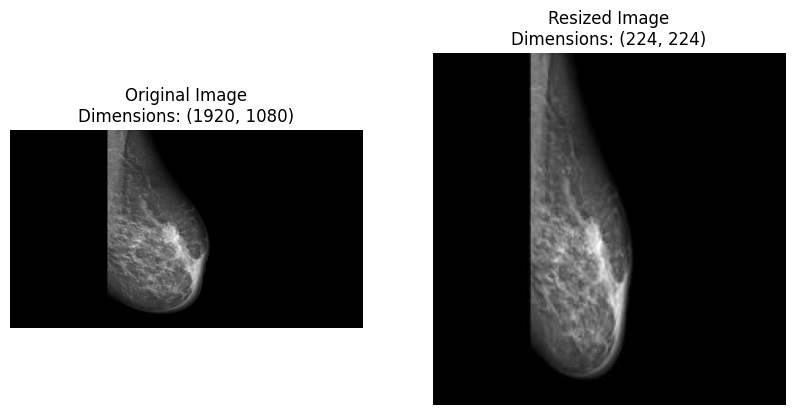

Resizing /content/Original Dataset/Cancer/IMG (97).jpg...
Resizing /content/Original Dataset/Cancer/IMG (89).jpg...
Resizing /content/Original Dataset/Cancer/IMG (34).jpg...
Resizing /content/Original Dataset/Cancer/IMG (29).jpg...
Resizing /content/Original Dataset/Cancer/IMG (5).jpg...
Resizing /content/Original Dataset/Cancer/IMG (82).jpg...
Resizing /content/Original Dataset/Cancer/IMG (85).jpg...
Resizing /content/Original Dataset/Cancer/IMG (125).jpg...
Resizing /content/Original Dataset/Cancer/IMG (18).jpg...
Resizing /content/Original Dataset/Cancer/IMG (124).jpg...
Resizing /content/Original Dataset/Cancer/IMG (10).jpg...
Resizing /content/Original Dataset/Cancer/IMG (22).jpg...
Resizing /content/Original Dataset/Cancer/IMG (104).jpg...
Resizing /content/Original Dataset/Cancer/IMG (23).jpg...
Resizing /content/Original Dataset/Cancer/IMG (3).jpg...
Resizing /content/Original Dataset/Cancer/IMG (15).jpg...
Resizing /content/Original Dataset/Cancer/IMG (122).jpg...
Resizing /co

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

def resize_image(input_image_path, output_image_path, size=(224, 224)):
    original_image = Image.open(input_image_path)
    resized_image = original_image.resize(size)
    resized_image.save(output_image_path)

def resize_images_in_directory(input_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    resize_compare_flag = True
    for class_name in ['Cancer', 'Non-Cancer']:
        input_folder = os.path.join(input_directory, class_name)
        output_folder = os.path.join(output_directory, class_name)
        os.makedirs(output_folder, exist_ok=True)

        for filename in os.listdir(input_folder):
            input_image_path = os.path.join(input_folder, filename)
            output_image_path = os.path.join(output_folder, filename)

            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)

            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                print(f"Resizing {input_image_path}...")
                resize_image(input_image_path, output_image_path)
                if resize_compare_flag:
                    compare_images(input_image_path, output_image_path)
                    resize_compare_flag = False

def compare_images(original_image_path, resized_image_path):
    original_image = Image.open(original_image_path).convert('L')
    resized_image = Image.open(resized_image_path).convert('L')
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title(f'Original Image\nDimensions: {original_image.size}')
    ax[0].axis('off')
    ax[1].imshow(resized_image, cmap='gray')
    ax[1].set_title(f'Resized Image\nDimensions: {resized_image.size}')
    ax[1].axis('off')
    plt.show()

input_directory = '/content/Original Dataset'
output_directory = '/content/Dataset_resized'

resize_images_in_directory(input_directory, output_directory)

Applying erosion to /content/Dataset_resized/Cancer/IMG (87).jpg...


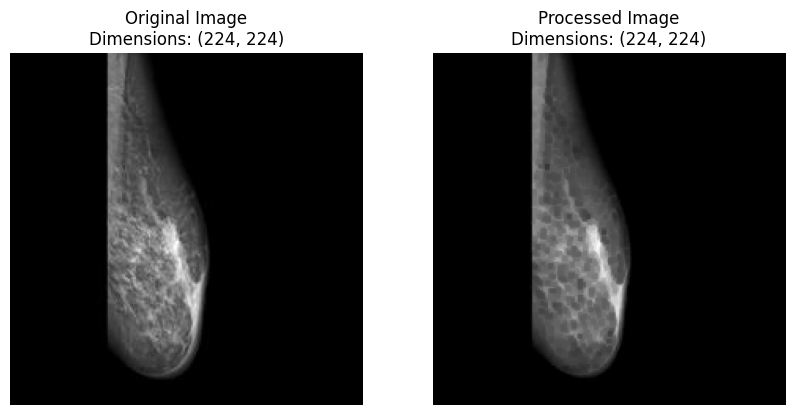

Applying erosion to /content/Dataset_resized/Cancer/IMG (97).jpg...
Applying erosion to /content/Dataset_resized/Cancer/IMG (89).jpg...
Applying erosion to /content/Dataset_resized/Cancer/IMG (34).jpg...
Applying erosion to /content/Dataset_resized/Cancer/IMG (29).jpg...
Applying erosion to /content/Dataset_resized/Cancer/IMG (5).jpg...
Applying erosion to /content/Dataset_resized/Cancer/IMG (82).jpg...
Applying erosion to /content/Dataset_resized/Cancer/IMG (85).jpg...
Applying erosion to /content/Dataset_resized/Cancer/IMG (125).jpg...
Applying erosion to /content/Dataset_resized/Cancer/IMG (18).jpg...
Applying erosion to /content/Dataset_resized/Cancer/IMG (124).jpg...
Applying erosion to /content/Dataset_resized/Cancer/IMG (10).jpg...
Applying erosion to /content/Dataset_resized/Cancer/IMG (22).jpg...
Applying erosion to /content/Dataset_resized/Cancer/IMG (104).jpg...
Applying erosion to /content/Dataset_resized/Cancer/IMG (23).jpg...
Applying erosion to /content/Dataset_resized/C

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def morphological_processing(input_image_path, output_image_path, operation='erosion', kernel_size=3):
    original_image = Image.open(input_image_path).convert('L')

    image_np = np.array(original_image)

    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    if operation == 'erosion':
        processed_image_np = erosion(image_np, kernel)
    elif operation == 'dilation':
        processed_image_np = dilation(image_np, kernel)
    else:
        raise ValueError("Unsupported operation. Use 'erosion' or 'dilation'.")

    processed_image = Image.fromarray(processed_image_np)

    processed_image.save(output_image_path)
    return original_image, processed_image

def apply_morphological_processing_in_directory(input_directory, output_directory, operation='erosion', kernel_size=3):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    morph_compare_flag = True
    for class_name in ['Cancer', 'Non-Cancer']:
        input_folder = os.path.join(input_directory, class_name)
        output_folder = os.path.join(output_directory, class_name)
        os.makedirs(output_folder, exist_ok=True)

        for filename in os.listdir(input_folder):
            input_image_path = os.path.join(input_folder, filename)
            output_image_path = os.path.join(output_folder, filename)

            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)

            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                print(f"Applying {operation} to {input_image_path}...")
                original_image, processed_image = morphological_processing(input_image_path, output_image_path, operation, kernel_size)
                if morph_compare_flag:
                    compare_images(original_image, processed_image)
                    morph_compare_flag = False

def erosion(image_np, kernel):
    return cv2.erode(image_np, kernel, iterations=1)

def dilation(image_np, kernel):
    return cv2.dilate(image_np, kernel, iterations=1)

def compare_images(original_image, processed_image):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title(f'Original Image\nDimensions: {original_image.size}')
    ax[0].axis('off')
    ax[1].imshow(processed_image, cmap='gray')
    ax[1].set_title(f'Processed Image\nDimensions: {processed_image.size}')
    ax[1].axis('off')
    plt.show()

input_directory = '/content/Dataset_resized'
output_directory = '/content/morpho_processed'

apply_morphological_processing_in_directory(input_directory, output_directory, operation='erosion', kernel_size=3)


Applying CLAHE to /content/morpho_processed/Cancer/IMG (87).jpg...


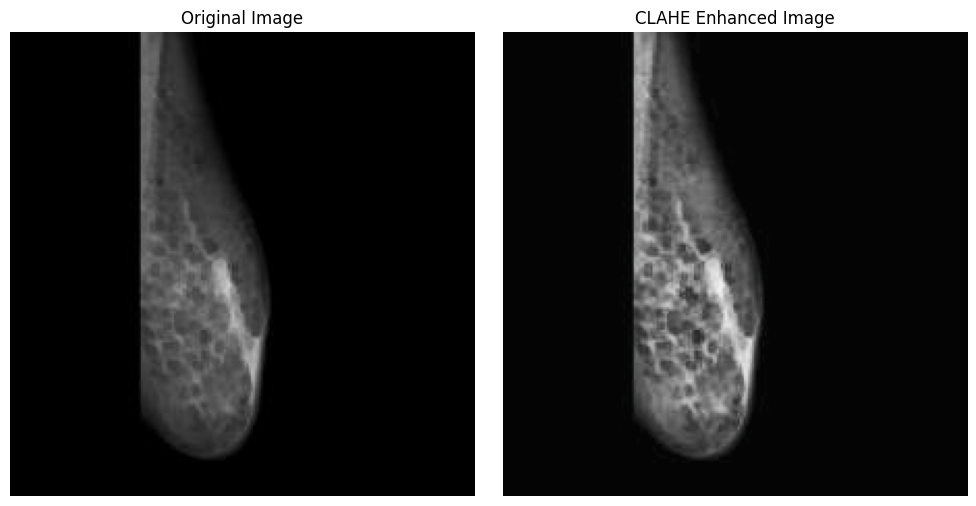

Applying CLAHE to /content/morpho_processed/Cancer/IMG (97).jpg...
Applying CLAHE to /content/morpho_processed/Cancer/IMG (89).jpg...
Applying CLAHE to /content/morpho_processed/Cancer/IMG (34).jpg...
Applying CLAHE to /content/morpho_processed/Cancer/IMG (29).jpg...
Applying CLAHE to /content/morpho_processed/Cancer/IMG (5).jpg...
Applying CLAHE to /content/morpho_processed/Cancer/IMG (82).jpg...
Applying CLAHE to /content/morpho_processed/Cancer/IMG (85).jpg...
Applying CLAHE to /content/morpho_processed/Cancer/IMG (125).jpg...
Applying CLAHE to /content/morpho_processed/Cancer/IMG (18).jpg...
Applying CLAHE to /content/morpho_processed/Cancer/IMG (124).jpg...
Applying CLAHE to /content/morpho_processed/Cancer/IMG (10).jpg...
Applying CLAHE to /content/morpho_processed/Cancer/IMG (22).jpg...
Applying CLAHE to /content/morpho_processed/Cancer/IMG (104).jpg...
Applying CLAHE to /content/morpho_processed/Cancer/IMG (23).jpg...
Applying CLAHE to /content/morpho_processed/Cancer/IMG (3).j

In [ ]:
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt

def apply_CLAHE(image):
    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    lab = cv2.cvtColor(image_cv, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    final_bgr = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    final_rgb = cv2.cvtColor(final_bgr, cv2.COLOR_BGR2RGB)
    final_image = Image.fromarray(final_rgb)
    return final_image

def apply_CLAHE_and_compare(input_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    hist_compare_flag = True
    for class_name in ['Cancer', 'Non-Cancer']:
        input_folder = os.path.join(input_directory, class_name)
        output_folder = os.path.join(output_directory, class_name)
        os.makedirs(output_folder, exist_ok=True)

        for filename in os.listdir(input_folder):
            input_image_path = os.path.join(input_folder, filename)
            output_image_path = os.path.join(output_folder, filename)

            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)

            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                print(f"Applying CLAHE to {input_image_path}...")
                original_image = Image.open(input_image_path).convert("RGB")
                clahe_image = apply_CLAHE(original_image)
                clahe_image.save(output_image_path)

                if hist_compare_flag:
                    compare_images(original_image, clahe_image)
                    hist_compare_flag = False

def compare_images(original_image, processed_image):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes = axes.ravel()
    axes[0].imshow(original_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(processed_image)
    axes[1].set_title('CLAHE Enhanced Image')
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

input_directory = '/content/morpho_processed'
output_directory = '/content/Dataset_CLAHE'

apply_CLAHE_and_compare(input_directory, output_directory)


Applying bilateral filtering to /content/Dataset_CLAHE/Cancer/IMG (87).jpg...


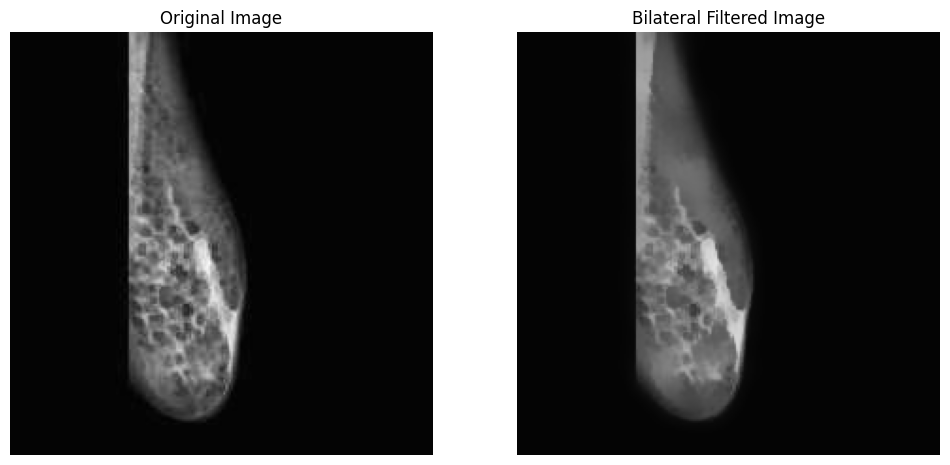

Applying bilateral filtering to /content/Dataset_CLAHE/Cancer/IMG (97).jpg...
Applying bilateral filtering to /content/Dataset_CLAHE/Cancer/IMG (89).jpg...
Applying bilateral filtering to /content/Dataset_CLAHE/Cancer/IMG (34).jpg...
Applying bilateral filtering to /content/Dataset_CLAHE/Cancer/IMG (29).jpg...
Applying bilateral filtering to /content/Dataset_CLAHE/Cancer/IMG (5).jpg...
Applying bilateral filtering to /content/Dataset_CLAHE/Cancer/IMG (82).jpg...
Applying bilateral filtering to /content/Dataset_CLAHE/Cancer/IMG (85).jpg...
Applying bilateral filtering to /content/Dataset_CLAHE/Cancer/IMG (125).jpg...
Applying bilateral filtering to /content/Dataset_CLAHE/Cancer/IMG (18).jpg...
Applying bilateral filtering to /content/Dataset_CLAHE/Cancer/IMG (124).jpg...
Applying bilateral filtering to /content/Dataset_CLAHE/Cancer/IMG (10).jpg...
Applying bilateral filtering to /content/Dataset_CLAHE/Cancer/IMG (22).jpg...
Applying bilateral filtering to /content/Dataset_CLAHE/Cancer/I

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

def apply_bilateral_filtering_and_compare(input_directory, output_directory, d=15, sigmaColor=75, sigmaSpace=75):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    bilateral_compare_flag = True
    for class_name in ['Cancer', 'Non-Cancer']:
        input_folder = os.path.join(input_directory, class_name)
        output_folder = os.path.join(output_directory, class_name)
        os.makedirs(output_folder, exist_ok=True)

        for filename in os.listdir(input_folder):
            input_image_path = os.path.join(input_folder, filename)
            output_image_path = os.path.join(output_folder, filename)

            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                print(f"Applying bilateral filtering to {input_image_path}...")
                image = cv2.imread(input_image_path)
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                filtered_image = cv2.bilateralFilter(image_rgb, d=d, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace)
                filtered_image_bgr = cv2.cvtColor(filtered_image, cv2.COLOR_RGB2BGR)
                cv2.imwrite(output_image_path, filtered_image_bgr)

                if bilateral_compare_flag:
                    compare_images(image_rgb, filtered_image)
                    bilateral_compare_flag = False

def compare_images(original_image, filtered_image):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(original_image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(filtered_image)
    ax[1].set_title('Bilateral Filtered Image')
    ax[1].axis('off')

    plt.show()

input_directory = '/content/Dataset_CLAHE'
output_directory = '/content/bilateral_filtered'

apply_bilateral_filtering_and_compare(input_directory, output_directory)

In [ ]:
import albumentations as A
import cv2
import os
import numpy as np

def denormalize_image(img):
    img = (img * 1.0) * 255
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

def augment_images_evenly(input_directory, output_directory, augmentation_pipelines, total_images_per_class=2500):
    os.makedirs(output_directory, exist_ok=True)

    num_augmentations = len(augmentation_pipelines)
    images_per_aug = total_images_per_class // num_augmentations
    remainder = total_images_per_class % num_augmentations

    for class_name in os.listdir(input_directory):
        if class_name.startswith('.'):
            continue

        class_folder = os.path.join(input_directory, class_name)
        if not os.path.isdir(class_folder):
            continue

        output_class_directory = os.path.join(output_directory, class_name)
        os.makedirs(output_class_directory, exist_ok=True)

        images = []
        for filename in os.listdir(class_folder):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                img_path = os.path.join(class_folder, filename)
                image = cv2.imread(img_path)
                if image is not None:
                    images.append(image)

        for i, (aug_name, aug_pipeline) in enumerate(augmentation_pipelines.items()):
            count = images_per_aug + (1 if i < remainder else 0)
            print(f"Applying {aug_name} on class {class_name} with {count} images")

            augmented_count = 0
            while augmented_count < count:
                for image in images:
                    augmented = aug_pipeline(image=image)['image']

                    if aug_name == "Normalization":
                        augmented = denormalize_image(augmented)

                    save_name = f"{class_name}_{aug_name}_{augmented_count + 1}.jpg"
                    save_path = os.path.join(output_class_directory, save_name)
                    cv2.imwrite(save_path, augmented)

                    augmented_count += 1
                    if augmented_count >= count:
                        break

augmentation_pipelines = {
    "Horizontal_Flip": A.Compose([A.HorizontalFlip(p=1.0)]),
    "Vertical_Flip": A.Compose([A.VerticalFlip(p=1.0)]),
    "Rotation": A.Compose([A.Rotate(limit=25, p=1.0)]),
    "Shear_Transform": A.Compose([A.Affine(shear={"x": (-10, 10), "y": (-5, 5)}, p=1.0)]),
    "Brightness_Contrast_Adj": A.Compose([A.RandomBrightnessContrast(contrast_limit=0.3, brightness_limit=0.2, p=1.0)]),
    "Zoom_In": A.Compose([
        A.Resize(800, 800),
        A.CenterCrop(680, 680)
    ], p=1.0),
    "Zoom_Out": A.Compose([
        A.Resize(500, 500),
        A.PadIfNeeded(680, 680, border_mode=cv2.BORDER_CONSTANT, value=(0,0,0))
    ], p=1.0),
    "Normalization": A.Compose([A.Normalize(mean=(0, 0, 0), std=(1, 1, 1), p=1.0)]),
    "Random Crop":    A.Compose([A.RandomCrop(height=150, width=150, p=1.0)]),
    "Sharpen": A.Sharpen(alpha=(0.1, 0.5), lightness=(0.2, 0.5), p=1.0),
    "Motion Blur": A.Compose([A.MotionBlur(blur_limit=5, p=1.0)])

}

input_directory = '/content/bilateral_filtered'
output_directory = '/content/Augmented_images'

augment_images_evenly(input_directory, output_directory, augmentation_pipelines, total_images_per_class=2500)


/tmp/ipython-input-2987895573.py:69: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(680, 680, border_mode=cv2.BORDER_CONSTANT, value=(0,0,0))


Applying Horizontal_Flip on class Cancer with 228 images
Applying Vertical_Flip on class Cancer with 228 images
Applying Rotation on class Cancer with 228 images
Applying Shear_Transform on class Cancer with 227 images
Applying Brightness_Contrast_Adj on class Cancer with 227 images
Applying Zoom_In on class Cancer with 227 images
Applying Zoom_Out on class Cancer with 227 images
Applying Normalization on class Cancer with 227 images
Applying Random Crop on class Cancer with 227 images
Applying Sharpen on class Cancer with 227 images
Applying Motion Blur on class Cancer with 227 images
Applying Horizontal_Flip on class Non-Cancer with 228 images
Applying Vertical_Flip on class Non-Cancer with 228 images
Applying Rotation on class Non-Cancer with 228 images
Applying Shear_Transform on class Non-Cancer with 227 images
Applying Brightness_Contrast_Adj on class Non-Cancer with 227 images
Applying Zoom_In on class Non-Cancer with 227 images
Applying Zoom_Out on class Non-Cancer with 227 ima

In [ ]:
import os
import shutil
import random
from tqdm import tqdm

def split_dataset(source_dir, train_dir, test_dir, val_dir, split_ratio=(0.8, 0.12, 0.08)):
    for class_name in os.listdir(source_dir):
        class_dir = os.path.join(source_dir, class_name)
        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)

        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)

        files = os.listdir(class_dir)
        random.shuffle(files)

        num_files = len(files)
        train_split = int(num_files * split_ratio[0])
        test_split = int(num_files * split_ratio[1])

        train_files = files[:train_split]
        test_files = files[train_split:train_split + test_split]
        val_files = files[train_split + test_split:]

        for file in tqdm(train_files, desc=f"Copying {class_name} train files"):
            shutil.copy(os.path.join(class_dir, file), os.path.join(train_class_dir, file))

        for file in tqdm(test_files, desc=f"Copying {class_name} test files"):
            shutil.copy(os.path.join(class_dir, file), os.path.join(test_class_dir, file))

        for file in tqdm(val_files, desc=f"Copying {class_name} validation files"):
            shutil.copy(os.path.join(class_dir, file), os.path.join(val_class_dir, file))

source_dir = "/content/Augmented_images"
train_dir = "/content/train"
test_dir = "/content/test"
val_dir = "/content/validation"

split_dataset(source_dir, train_dir, test_dir, val_dir)


Copying Non-Cancer validation files: 100%|██████████| 200/200 [00:00<00:00, 3270.76it/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201, VGG19
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, Multiply, Add, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

INPUT_SIZE = 224
BATCH_SIZE = 16
NUM_CLASSES = 2
CLASS_MODE = 'categorical'
SEED = 42

TRAIN_DIR = '/content/train'
VAL_DIR = '/content/validation'
TEST_DIR = '/content/test'

STAGE1_EPOCHS = 20
STAGE2_EPOCHS = 30
UNFREEZE_LAST_N = 50

HEAD_LR = 1e-4
FINETUNE_LR = 1e-5

train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    TRAIN_DIR,
    target_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    shuffle=True,
    seed=SEED
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    VAL_DIR,
    target_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    shuffle=False
)

def build_hybrid_model(input_shape=(INPUT_SIZE, INPUT_SIZE, 3), num_classes=NUM_CLASSES):
    inputs = Input(shape=input_shape)
    densenet = DenseNet201(include_top=False, weights='imagenet', input_tensor=inputs)
    vgg19 = VGG19(include_top=False, weights='imagenet', input_tensor=inputs)
    gap_den = GlobalAveragePooling2D()(densenet.output)
    gap_vgg = GlobalAveragePooling2D()(vgg19.output)
    gap_den = BatchNormalization()(gap_den)
    gap_vgg = BatchNormalization()(gap_vgg)
    proj_den = Dense(1024, activation='relu')(gap_den)
    proj_vgg = Dense(1024, activation='relu')(gap_vgg)
    w_den = Dense(1024, activation='sigmoid')(proj_den)
    w_vgg = Dense(1024, activation='sigmoid')(proj_vgg)
    gated_den = Multiply()([proj_den, w_den])
    gated_vgg = Multiply()([proj_vgg, w_vgg])
    fused = Add()([gated_den, gated_vgg])
    fused = BatchNormalization()(fused)
    fused = Activation('relu')(fused)
    x = Dense(512, activation='relu')(fused)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model, densenet, vgg19

model, densenet_backbone, vgg_backbone = build_hybrid_model()

def freeze_backbones(dense_model, vgg_model):
    for layer in dense_model.layers:
        layer.trainable = False
    for layer in vgg_model.layers:
        layer.trainable = False

def unfreeze_last_n(model, n):
    total = len(model.layers)
    for i, layer in enumerate(model.layers):
        layer.trainable = (i >= total - n)

freeze_backbones(densenet_backbone, vgg_backbone)

model.compile(optimizer=Adam(learning_rate=HEAD_LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_path = 'best_hybrid_stage1_densenet_vgg.h5'
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
]

history1 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=STAGE1_EPOCHS,
    callbacks=callbacks
)

unfreeze_last_n(densenet_backbone, UNFREEZE_LAST_N)
unfreeze_last_n(vgg_backbone, UNFREEZE_LAST_N)

model.compile(optimizer=Adam(learning_rate=FINETUNE_LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_path2 = 'best_hybrid_finetune_densenet_vgg.h5'
callbacks2 = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ModelCheckpoint(checkpoint_path2, monitor='val_loss', save_best_only=True, verbose=1)
]

history2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=STAGE2_EPOCHS,
    callbacks=callbacks2
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    TEST_DIR,
    target_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    shuffle=False
)

results = model.evaluate(test_gen, verbose=1)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

model.save('hybrid_densenet201_vgg19_final.h5')


Found 4000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.8295 - loss: 0.3961
Epoch 1: val_loss improved from inf to 0.28536, saving model to best_hybrid_stage1_densenet_vgg.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 127s 290ms/step - accuracy: 0.8297 - loss: 0.3956 - val_accuracy: 0.9325 - val_loss: 0.2854 - learning_rate: 1.0000e-04
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9555 - loss: 0.1202
Epoch 2: val_loss improved from 0.28536 to 0.06596, saving model to best_hybrid_stage1_densenet_vgg.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 206ms/step - accuracy: 0.9555 - loss: 0.1202 - val_accuracy: 0.9825 - val_loss: 0.0660 - learning_rate: 1.0000e-04
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9752 - loss: 0.0662
Epoch 3: val_loss improved from 0.06596 to 0.04662, saving model to best_hybrid_stage1_densenet_vgg.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 189ms/step - accuracy: 0.9752 - loss: 0.0662 - val_accuracy: 0.9775 - val_loss: 0.0466 - learning_rate: 1.0000e-04
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9783 - loss: 0.0652
Epoch 4: val_loss improved from 0.04662 to 0.03376, saving model to best_hybrid_stage1_densenet_vgg.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 192ms/step - accuracy: 0.9783 - loss: 0.0651 - val_accuracy: 0.9900 - val_loss: 0.0338 - learning_rate: 1.0000e-04
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9865 - loss: 0.0346
Epoch 5: val_loss did not improve from 0.03376
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 180ms/step - accuracy: 0.9865 - loss: 0.0347 - val_accuracy: 0.9775 - val_loss: 0.0669 - learning_rate: 1.0000e-04
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9876 - loss: 0.0364
Epoch 6: val_loss did not improve from 0.03376
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 180ms/step - accuracy: 0.9876 - loss: 0.0364 - val_accuracy: 0.9850 - val_loss: 0.0459 - learning_rate: 1.0000e-04
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9845 - loss: 0.0414
Epoch 7: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 7: val_loss did not improve from 0.03376
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 180ms/step - accuracy: 0.9845 - loss: 0.0

250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 209ms/step - accuracy: 0.9918 - loss: 0.0268 - val_accuracy: 0.9875 - val_loss: 0.0282 - learning_rate: 5.0000e-05
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9880 - loss: 0.0331
Epoch 10: val_loss improved from 0.02819 to 0.02768, saving model to best_hybrid_stage1_densenet_vgg.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 192ms/step - accuracy: 0.9880 - loss: 0.0331 - val_accuracy: 0.9925 - val_loss: 0.0277 - learning_rate: 5.0000e-05
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.9953 - loss: 0.0208
Epoch 11: val_loss did not improve from 0.02768
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 178ms/step - accuracy: 0.9953 - loss: 0.0208 - val_accuracy: 0.9875 - val_loss: 0.0324 - learning_rate: 5.0000e-05
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.9929 - loss: 0.0202
Epoch 12: val_loss did not improve from 0.02768
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 178ms/step - accuracy: 0.9929 - loss: 0.0202 - val_accuracy: 0.9925 - val_loss: 0.0279 - learning_rate: 5.0000e-05
Epoch 13/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9934 - loss: 0.0180
Epoch 13: val_loss improved from 0.02768 to 0.02423, saving model to best_hybrid_stage1_densenet_vgg.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 197ms/step - accuracy: 0.9934 - loss: 0.0180 - val_accuracy: 0.9950 - val_loss: 0.0242 - learning_rate: 5.0000e-05
Epoch 14/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9953 - loss: 0.0144
Epoch 14: val_loss did not improve from 0.02423
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 188ms/step - accuracy: 0.9953 - loss: 0.0144 - val_accuracy: 0.9900 - val_loss: 0.0280 - learning_rate: 5.0000e-05
Epoch 15/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9966 - loss: 0.0101
Epoch 15: val_loss did not improve from 0.02423
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 189ms/step - accuracy: 0.9966 - loss: 0.0101 - val_accuracy: 0.9900 - val_loss: 0.0351 - learning_rate: 5.0000e-05
Epoch 16/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.9954 - loss: 0.0115
Epoch 16: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.

Epoch 16: val_loss did not improve from 0.02423
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 179ms/step - accuracy: 0.9954 - lo

250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 197ms/step - accuracy: 0.9952 - loss: 0.0141 - val_accuracy: 0.9925 - val_loss: 0.0237 - learning_rate: 2.5000e-05
Epoch 18/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9973 - loss: 0.0089
Epoch 18: val_loss did not improve from 0.02365
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 178ms/step - accuracy: 0.9973 - loss: 0.0089 - val_accuracy: 0.9875 - val_loss: 0.0257 - learning_rate: 2.5000e-05
Epoch 19/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9945 - loss: 0.0142
Epoch 19: val_loss did not improve from 0.02365
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 179ms/step - accuracy: 0.9945 - loss: 0.0142 - val_accuracy: 0.9875 - val_loss: 0.0293 - learning_rate: 2.5000e-05
Epoch 20/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.9988 - loss: 0.0056
Epoch 20: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.

Epoch 20: val_loss did not improve from 0.02365
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 179ms/step - accuracy: 0.9988 - lo

250/250 ━━━━━━━━━━━━━━━━━━━━ 212s 494ms/step - accuracy: 0.9883 - loss: 0.0323 - val_accuracy: 0.8425 - val_loss: 0.5641 - learning_rate: 1.0000e-05
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9893 - loss: 0.0261
Epoch 2: val_loss improved from 0.56406 to 0.05936, saving model to best_hybrid_finetune_densenet_vgg.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 103s 410ms/step - accuracy: 0.9893 - loss: 0.0261 - val_accuracy: 0.9825 - val_loss: 0.0594 - learning_rate: 1.0000e-05
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9908 - loss: 0.0240
Epoch 3: val_loss improved from 0.05936 to 0.04878, saving model to best_hybrid_finetune_densenet_vgg.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 102s 406ms/step - accuracy: 0.9908 - loss: 0.0240 - val_accuracy: 0.9850 - val_loss: 0.0488 - learning_rate: 1.0000e-05
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9904 - loss: 0.0271
Epoch 4: val_loss improved from 0.04878 to 0.03343, saving model to best_hybrid_finetune_densenet_vgg.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 419ms/step - accuracy: 0.9904 - loss: 0.0271 - val_accuracy: 0.9950 - val_loss: 0.0334 - learning_rate: 1.0000e-05
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.9941 - loss: 0.0248
Epoch 5: val_loss did not improve from 0.03343
250/250 ━━━━━━━━━━━━━━━━━━━━ 88s 353ms/step - accuracy: 0.9941 - loss: 0.0248 - val_accuracy: 0.9875 - val_loss: 0.0591 - learning_rate: 1.0000e-05
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.9902 - loss: 0.0272
Epoch 6: val_loss did not improve from 0.03343
250/250 ━━━━━━━━━━━━━━━━━━━━ 89s 355ms/step - accuracy: 0.9902 - loss: 0.0272 - val_accuracy: 0.9950 - val_loss: 0.0334 - learning_rate: 1.0000e-05
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.9944 - loss: 0.0176
Epoch 7: val_loss improved from 0.03343 to 0.02538, saving model to best_hybrid_finetune_densenet_vgg.h5


250/250 ━━━━━━━━━━━━━━━━━━━━ 100s 400ms/step - accuracy: 0.9944 - loss: 0.0176 - val_accuracy: 0.9925 - val_loss: 0.0254 - learning_rate: 1.0000e-05
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9926 - loss: 0.0186
Epoch 8: val_loss did not improve from 0.02538
250/250 ━━━━━━━━━━━━━━━━━━━━ 89s 357ms/step - accuracy: 0.9926 - loss: 0.0186 - val_accuracy: 0.9850 - val_loss: 0.0488 - learning_rate: 1.0000e-05
Epoch 9/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9930 - loss: 0.0158
Epoch 9: val_loss did not improve from 0.02538
250/250 ━━━━━━━━━━━━━━━━━━━━ 89s 357ms/step - accuracy: 0.9930 - loss: 0.0158 - val_accuracy: 0.9900 - val_loss: 0.0487 - learning_rate: 1.0000e-05
Epoch 10/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.9924 - loss: 0.0187
Epoch 10: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.

Epoch 10: val_loss did not improve from 0.02538
250/250 ━━━━━━━━━━━━━━━━━━━━ 89s 356ms/step - accuracy: 0.9924 - loss:

250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 420ms/step - accuracy: 0.9953 - loss: 0.0143 - val_accuracy: 0.9975 - val_loss: 0.0241 - learning_rate: 2.5000e-06
Epoch 15/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9967 - loss: 0.0112
Epoch 15: val_loss did not improve from 0.02412
250/250 ━━━━━━━━━━━━━━━━━━━━ 89s 357ms/step - accuracy: 0.9967 - loss: 0.0112 - val_accuracy: 0.9900 - val_loss: 0.0275 - learning_rate: 2.5000e-06
Epoch 16/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9963 - loss: 0.0145
Epoch 16: val_loss did not improve from 0.02412
250/250 ━━━━━━━━━━━━━━━━━━━━ 89s 357ms/step - accuracy: 0.9963 - loss: 0.0145 - val_accuracy: 0.9900 - val_loss: 0.0344 - learning_rate: 2.5000e-06
Epoch 17/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.9971 - loss: 0.0099
Epoch 17: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-06.

Epoch 17: val_loss did not improve from 0.02412
250/250 ━━━━━━━━━━━━━━━━━━━━ 89s 356ms/step - accuracy: 0.9971 - l

250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 421ms/step - accuracy: 0.9957 - loss: 0.0112 - val_accuracy: 0.9975 - val_loss: 0.0233 - learning_rate: 1.2500e-06
Epoch 20/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.9955 - loss: 0.0106
Epoch 20: val_loss did not improve from 0.02330
250/250 ━━━━━━━━━━━━━━━━━━━━ 90s 361ms/step - accuracy: 0.9955 - loss: 0.0106 - val_accuracy: 0.9925 - val_loss: 0.0257 - learning_rate: 1.2500e-06
Epoch 21/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9986 - loss: 0.0055
Epoch 21: val_loss did not improve from 0.02330
250/250 ━━━━━━━━━━━━━━━━━━━━ 89s 358ms/step - accuracy: 0.9986 - loss: 0.0055 - val_accuracy: 0.9900 - val_loss: 0.0265 - learning_rate: 1.2500e-06
Epoch 22/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.9942 - loss: 0.0171
Epoch 22: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-07.

Epoch 22: val_loss did not improve from 0.02330
250/250 ━━━━━━━━━━━━━━━━━━━━ 91s 363ms/step - accuracy: 0.9942 - lo

Test Loss: 0.03345693647861481
Test Accuracy: 0.9933333396911621


Found 600 images belonging to 2 classes.
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step


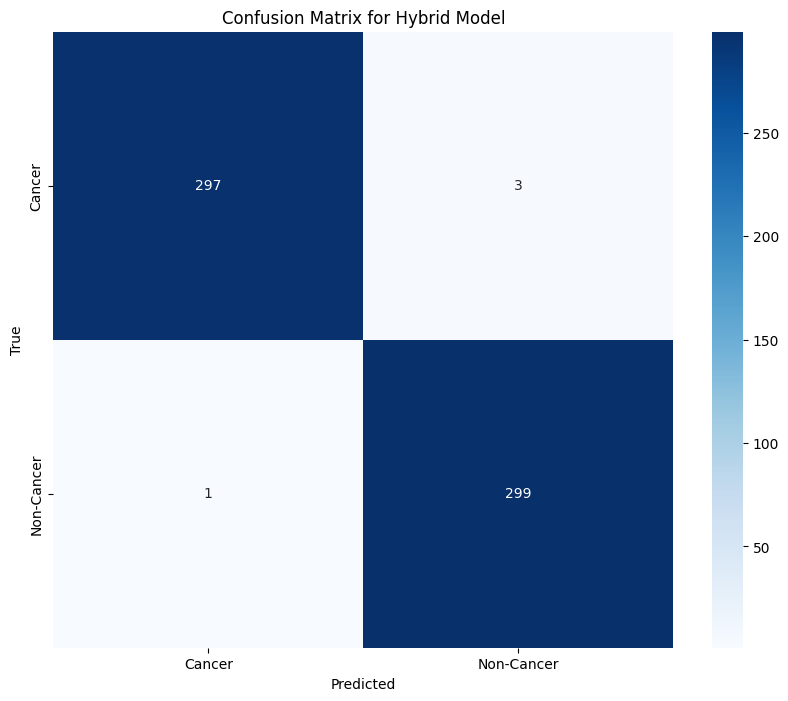

Classification Report
              precision    recall  f1-score   support

      Cancer       1.00      0.99      0.99       300
  Non-Cancer       0.99      1.00      0.99       300

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    shuffle=False
)

Y_pred = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE + 1)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred[:test_generator.samples])
cm_labels = list(test_generator.class_indices.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Hybrid Model')
plt.show()
print('Classification Report')
print(classification_report(test_generator.classes, y_pred[:test_generator.samples], target_names=cm_labels))

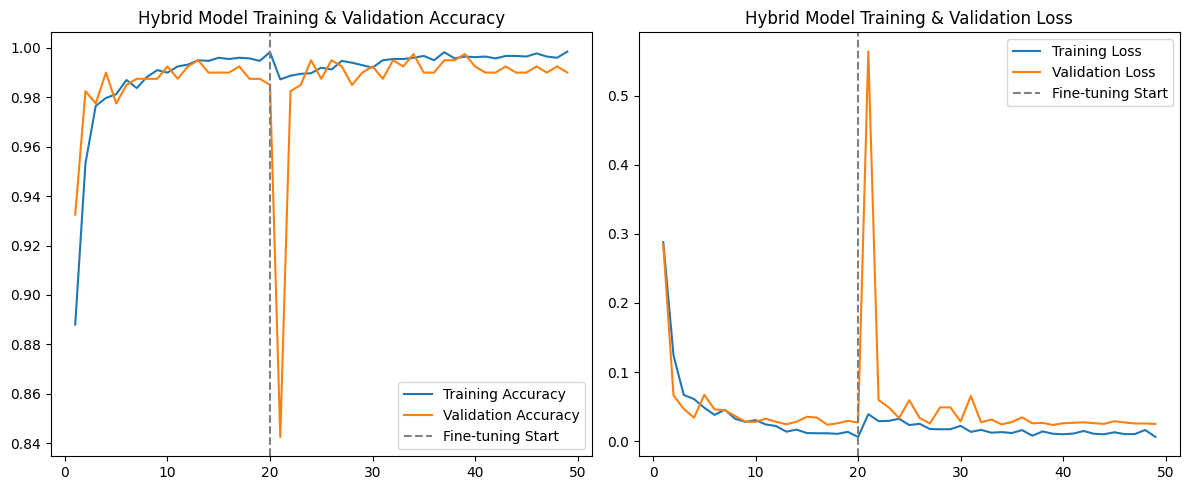

In [ ]:
acc = history1.history['accuracy'] + history2.history['accuracy']
val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
loss = history1.history['loss'] + history2.history['loss']
val_loss = history1.history['val_loss'] + history2.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.axvline(x=len(history1.history['accuracy']), color='gray', linestyle='--', label='Fine-tuning Start')
plt.legend(loc='lower right')
plt.title('Hybrid Model Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.axvline(x=len(history1.history['loss']), color='gray', linestyle='--', label='Fine-tuning Start')
plt.legend(loc='upper right')
plt.title('Hybrid Model Training & Validation Loss')

plt.tight_layout()
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step


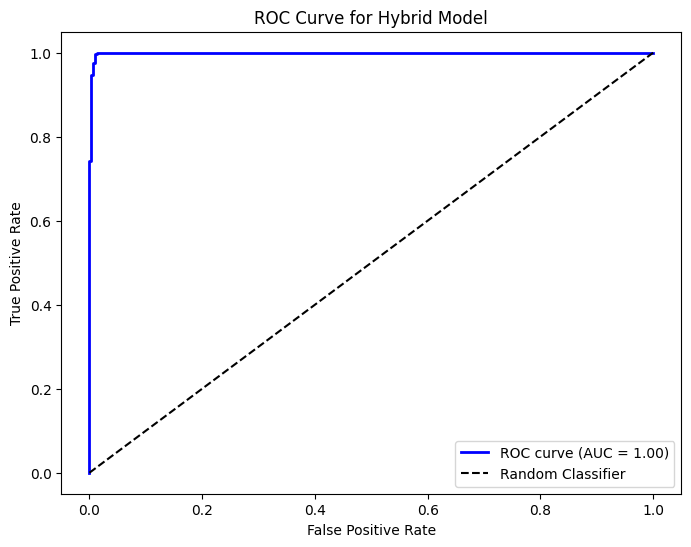

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Y_pred = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE + 1)
y_pred_prob = Y_pred[:, 1]

y_true = test_generator.classes

fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Hybrid Model')
plt.legend(loc='lower right')
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step


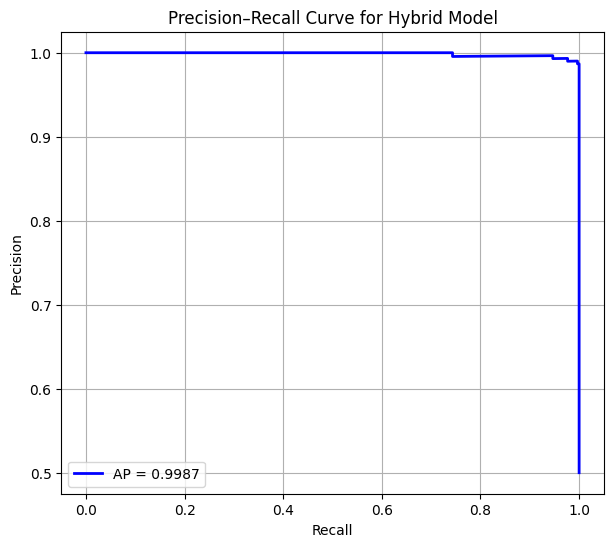

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_true = test_generator.classes
y_pred_prob = model.predict(test_generator, verbose=1)

y_score = y_pred_prob[:, 1]
precision, recall, _ = precision_recall_curve(y_true, y_score)
ap = average_precision_score(y_true, y_score)

plt.figure(figsize=(7, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'AP = {ap:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve for Hybrid Model')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

**Testing**

In [ ]:
!kaggle datasets download -d inbreast-dataset

Dataset URL: https://www.kaggle.com/datasets/mdsaymonahammad/inbreast-dataset
License(s): CC-BY-SA-4.0
 97% 663M/681M [00:56<00:01, 9.85MB/s]
100% 681M/681M [00:56<00:00, 12.7MB/s]


In [ ]:
!unzip /content/inbreast-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: BC INbreast/Non-Cancer/IMG (310)_Fliplr.jpg  
  inflating: BC INbreast/Non-Cancer/IMG (310)_GaussianBlur.jpg  
  inflating: BC INbreast/Non-Cancer/IMG (310)_LinearContrast.jpg  
  inflating: BC INbreast/Non-Cancer/IMG (310)_Multiply.jpg  
  inflating: BC INbreast/Non-Cancer/IMG (310)_PerspectiveTransform.jpg  
  inflating: BC INbreast/Non-Cancer/IMG (310)_PiecewiseAffine.jpg  
  inflating: BC INbreast/Non-Cancer/IMG (310)_Resize.jpg  
  inflating: BC INbreast/Non-Cancer/IMG (310)_Rotate.jpg  
  inflating: BC INbreast/Non-Cancer/IMG (311).jpg  
  inflating: BC INbreast/Non-Cancer/IMG (311)_AdditiveGaussianNoise.jpg  
  inflating: BC INbreast/Non-Cancer/IMG (311)_Crop.jpg  
  inflating: BC INbreast/Non-Cancer/IMG (311)_Dropout.jpg  
  inflating: BC INbreast/Non-Cancer/IMG (311)_ElasticTransformation.jpg  
  inflating: BC INbreast/Non-Cancer/IMG (311)_Fliplr.jpg  
  inflating: BC INbreast/Non-Cancer/IMG (311)_GaussianBlur.jpg

In [ ]:
import os

def count_images_per_class(dataset_directory):
    class_counts = {}

    for class_name in os.listdir(dataset_directory):
        class_folder = os.path.join(dataset_directory, class_name)

        if os.path.isdir(class_folder):
            images_count = len([f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))])
            class_counts[class_name] = images_count

    return class_counts

def print_class_counts(dataset_directory):
    class_counts = count_images_per_class(dataset_directory)

    print("Number of Classes:", len(class_counts))
    print("Class-wise Image Counts:")
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} images")

def main():
    dataset_directory = '/content/test data'
    print_class_counts(dataset_directory)

if __name__ == "__main__":
    main()


Number of Classes: 2
Class-wise Image Counts:
Cancer: 5112 images
Non-Cancer: 8060 images


Resizing /content/test data/Cancer/50999432 (60).png...


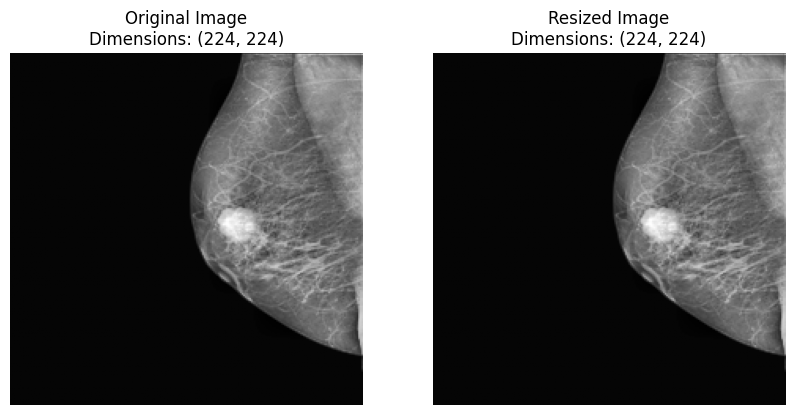

Streaming output truncated to the last 5000 lines.
Resizing /content/test data/Non-Cancer/IMG (310)_Resize.jpg...
Resizing /content/test data/Non-Cancer/IMG (317)_PerspectiveTransform.jpg...
Resizing /content/test data/Non-Cancer/IMG (360)_AdditiveGaussianNoise.jpg...
Resizing /content/test data/Non-Cancer/IMG (339)_LinearContrast.jpg...
Resizing /content/test data/Non-Cancer/IMG (187)_Fliplr.jpg...
Resizing /content/test data/Non-Cancer/IMG (165)_Multiply.jpg...
Resizing /content/test data/Non-Cancer/IMG (534)_ElasticTransformation.jpg...
Resizing /content/test data/Non-Cancer/IMG (604)_GaussianBlur.jpg...
Resizing /content/test data/Non-Cancer/IMG (237)_GaussianBlur.jpg...
Resizing /content/test data/Non-Cancer/IMG (70)_Rotate.jpg...
Resizing /content/test data/Non-Cancer/IMG (604)_Crop.jpg...
Resizing /content/test data/Non-Cancer/IMG (6)_Fliplr.jpg...
Resizing /content/test data/Non-Cancer/IMG (30)_Fliplr.jpg...
Resizing /content/test data/Non-Cancer/IMG (267)_PiecewiseAffine.jpg..

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

def resize_image(input_image_path, output_image_path, size=(224, 224)):
    original_image = Image.open(input_image_path)
    resized_image = original_image.resize(size)
    resized_image.save(output_image_path)

def resize_images_in_directory(input_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    resize_compare_flag = True
    for class_name in ['Cancer', 'Non-Cancer']:
        input_folder = os.path.join(input_directory, class_name)
        output_folder = os.path.join(output_directory, class_name)
        os.makedirs(output_folder, exist_ok=True)

        for filename in os.listdir(input_folder):
            input_image_path = os.path.join(input_folder, filename)
            output_image_path = os.path.join(output_folder, filename)

            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)

            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                print(f"Resizing {input_image_path}...")
                resize_image(input_image_path, output_image_path)
                if resize_compare_flag:
                    compare_images(input_image_path, output_image_path)
                    resize_compare_flag = False

def compare_images(original_image_path, resized_image_path):
    original_image = Image.open(original_image_path).convert('L')
    resized_image = Image.open(resized_image_path).convert('L')
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title(f'Original Image\nDimensions: {original_image.size}')
    ax[0].axis('off')
    ax[1].imshow(resized_image, cmap='gray')
    ax[1].set_title(f'Resized Image\nDimensions: {resized_image.size}')
    ax[1].axis('off')
    plt.show()

input_directory = '/content/test data'
output_directory = '/content/test_resized'

resize_images_in_directory(input_directory, output_directory)

Applying erosion to /content/test_resized/Cancer/50999432 (60).png...


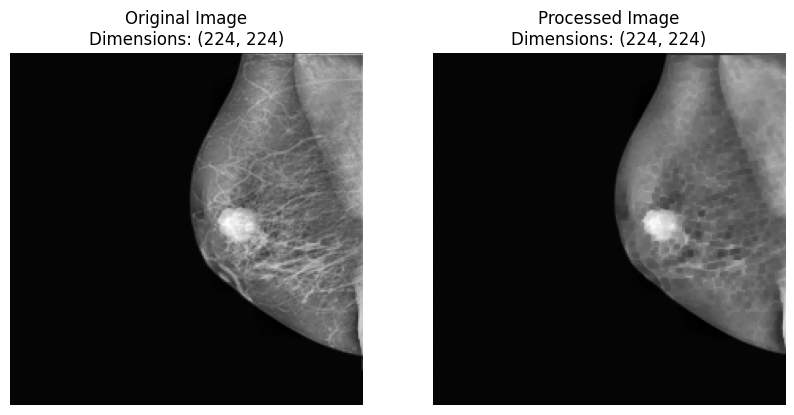

Streaming output truncated to the last 5000 lines.
Applying erosion to /content/test_resized/Non-Cancer/IMG (310)_Resize.jpg...
Applying erosion to /content/test_resized/Non-Cancer/IMG (317)_PerspectiveTransform.jpg...
Applying erosion to /content/test_resized/Non-Cancer/IMG (360)_AdditiveGaussianNoise.jpg...
Applying erosion to /content/test_resized/Non-Cancer/IMG (339)_LinearContrast.jpg...
Applying erosion to /content/test_resized/Non-Cancer/IMG (187)_Fliplr.jpg...
Applying erosion to /content/test_resized/Non-Cancer/IMG (165)_Multiply.jpg...
Applying erosion to /content/test_resized/Non-Cancer/IMG (534)_ElasticTransformation.jpg...
Applying erosion to /content/test_resized/Non-Cancer/IMG (604)_GaussianBlur.jpg...
Applying erosion to /content/test_resized/Non-Cancer/IMG (237)_GaussianBlur.jpg...
Applying erosion to /content/test_resized/Non-Cancer/IMG (70)_Rotate.jpg...
Applying erosion to /content/test_resized/Non-Cancer/IMG (604)_Crop.jpg...
Applying erosion to /content/test_resiz

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def morphological_processing(input_image_path, output_image_path, operation='erosion', kernel_size=3):
    original_image = Image.open(input_image_path).convert('L')

    image_np = np.array(original_image)

    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    if operation == 'erosion':
        processed_image_np = erosion(image_np, kernel)
    elif operation == 'dilation':
        processed_image_np = dilation(image_np, kernel)
    else:
        raise ValueError("Unsupported operation. Use 'erosion' or 'dilation'.")

    processed_image = Image.fromarray(processed_image_np)

    processed_image.save(output_image_path)
    return original_image, processed_image

def apply_morphological_processing_in_directory(input_directory, output_directory, operation='erosion', kernel_size=3):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    morph_compare_flag = True
    for class_name in ['Cancer', 'Non-Cancer']:
        input_folder = os.path.join(input_directory, class_name)
        output_folder = os.path.join(output_directory, class_name)
        os.makedirs(output_folder, exist_ok=True)

        for filename in os.listdir(input_folder):
            input_image_path = os.path.join(input_folder, filename)
            output_image_path = os.path.join(output_folder, filename)

            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)

            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                print(f"Applying {operation} to {input_image_path}...")
                original_image, processed_image = morphological_processing(input_image_path, output_image_path, operation, kernel_size)
                if morph_compare_flag:
                    compare_images(original_image, processed_image)
                    morph_compare_flag = False

def erosion(image_np, kernel):
    return cv2.erode(image_np, kernel, iterations=1)

def dilation(image_np, kernel):
    return cv2.dilate(image_np, kernel, iterations=1)

def compare_images(original_image, processed_image):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title(f'Original Image\nDimensions: {original_image.size}')
    ax[0].axis('off')
    ax[1].imshow(processed_image, cmap='gray')
    ax[1].set_title(f'Processed Image\nDimensions: {processed_image.size}')
    ax[1].axis('off')
    plt.show()

input_directory = '/content/test_resized'
output_directory = '/content/test_morpho_processed'

apply_morphological_processing_in_directory(input_directory, output_directory, operation='erosion', kernel_size=3)


Applying CLAHE to /content/test_morpho_processed/Cancer/50999432 (60).png...


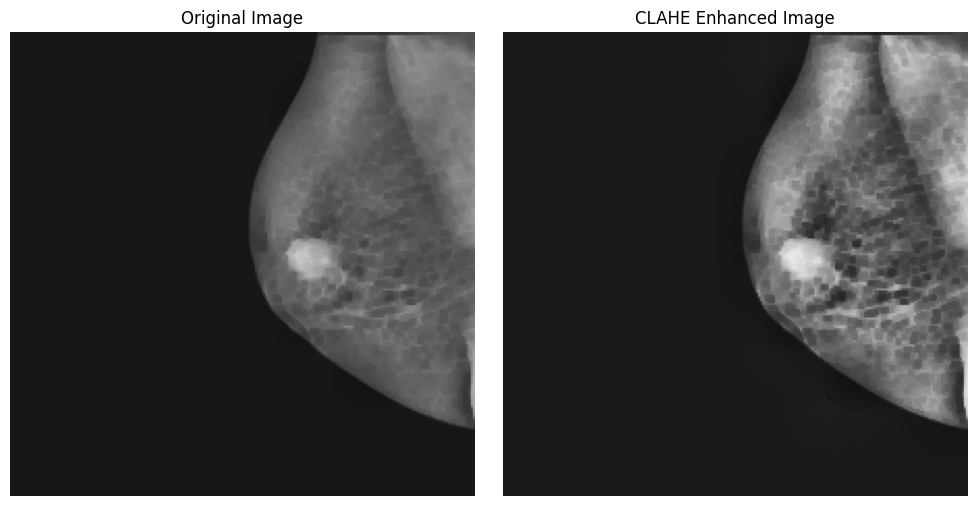

Streaming output truncated to the last 5000 lines.
Applying CLAHE to /content/test_morpho_processed/Non-Cancer/IMG (310)_Resize.jpg...
Applying CLAHE to /content/test_morpho_processed/Non-Cancer/IMG (317)_PerspectiveTransform.jpg...
Applying CLAHE to /content/test_morpho_processed/Non-Cancer/IMG (360)_AdditiveGaussianNoise.jpg...
Applying CLAHE to /content/test_morpho_processed/Non-Cancer/IMG (339)_LinearContrast.jpg...
Applying CLAHE to /content/test_morpho_processed/Non-Cancer/IMG (187)_Fliplr.jpg...
Applying CLAHE to /content/test_morpho_processed/Non-Cancer/IMG (165)_Multiply.jpg...
Applying CLAHE to /content/test_morpho_processed/Non-Cancer/IMG (534)_ElasticTransformation.jpg...
Applying CLAHE to /content/test_morpho_processed/Non-Cancer/IMG (604)_GaussianBlur.jpg...
Applying CLAHE to /content/test_morpho_processed/Non-Cancer/IMG (237)_GaussianBlur.jpg...
Applying CLAHE to /content/test_morpho_processed/Non-Cancer/IMG (70)_Rotate.jpg...
Applying CLAHE to /content/test_morpho_proce

In [ ]:
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt

def apply_CLAHE(image):
    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    lab = cv2.cvtColor(image_cv, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    final_bgr = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    final_rgb = cv2.cvtColor(final_bgr, cv2.COLOR_BGR2RGB)
    final_image = Image.fromarray(final_rgb)
    return final_image

def apply_CLAHE_and_compare(input_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    hist_compare_flag = True
    for class_name in ['Cancer', 'Non-Cancer']:
        input_folder = os.path.join(input_directory, class_name)
        output_folder = os.path.join(output_directory, class_name)
        os.makedirs(output_folder, exist_ok=True)

        for filename in os.listdir(input_folder):
            input_image_path = os.path.join(input_folder, filename)
            output_image_path = os.path.join(output_folder, filename)

            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)

            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                print(f"Applying CLAHE to {input_image_path}...")
                original_image = Image.open(input_image_path).convert("RGB")
                clahe_image = apply_CLAHE(original_image)
                clahe_image.save(output_image_path)

                if hist_compare_flag:
                    compare_images(original_image, clahe_image)
                    hist_compare_flag = False

def compare_images(original_image, processed_image):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes = axes.ravel()
    axes[0].imshow(original_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(processed_image)
    axes[1].set_title('CLAHE Enhanced Image')
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

input_directory = '/content/test_morpho_processed'
output_directory = '/content/test_CLAHE'

apply_CLAHE_and_compare(input_directory, output_directory)


Applying bilateral filtering to /content/test_CLAHE/Cancer/50999432 (60).png...


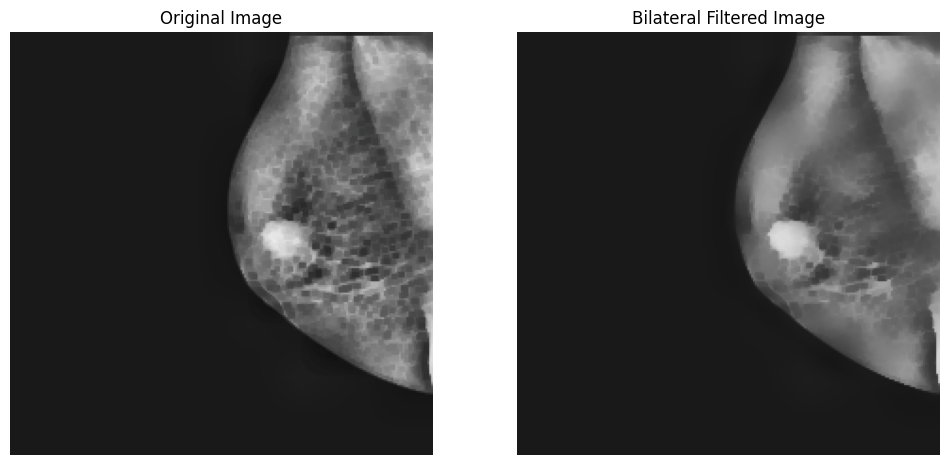

Streaming output truncated to the last 5000 lines.
Applying bilateral filtering to /content/test_CLAHE/Non-Cancer/IMG (310)_Resize.jpg...
Applying bilateral filtering to /content/test_CLAHE/Non-Cancer/IMG (317)_PerspectiveTransform.jpg...
Applying bilateral filtering to /content/test_CLAHE/Non-Cancer/IMG (360)_AdditiveGaussianNoise.jpg...
Applying bilateral filtering to /content/test_CLAHE/Non-Cancer/IMG (339)_LinearContrast.jpg...
Applying bilateral filtering to /content/test_CLAHE/Non-Cancer/IMG (187)_Fliplr.jpg...
Applying bilateral filtering to /content/test_CLAHE/Non-Cancer/IMG (165)_Multiply.jpg...
Applying bilateral filtering to /content/test_CLAHE/Non-Cancer/IMG (534)_ElasticTransformation.jpg...
Applying bilateral filtering to /content/test_CLAHE/Non-Cancer/IMG (604)_GaussianBlur.jpg...
Applying bilateral filtering to /content/test_CLAHE/Non-Cancer/IMG (237)_GaussianBlur.jpg...
Applying bilateral filtering to /content/test_CLAHE/Non-Cancer/IMG (70)_Rotate.jpg...
Applying bilat

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

def apply_bilateral_filtering_and_compare(input_directory, output_directory, d=15, sigmaColor=75, sigmaSpace=75):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    bilateral_compare_flag = True
    for class_name in ['Cancer', 'Non-Cancer']:
        input_folder = os.path.join(input_directory, class_name)
        output_folder = os.path.join(output_directory, class_name)
        os.makedirs(output_folder, exist_ok=True)

        for filename in os.listdir(input_folder):
            input_image_path = os.path.join(input_folder, filename)
            output_image_path = os.path.join(output_folder, filename)

            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                print(f"Applying bilateral filtering to {input_image_path}...")
                image = cv2.imread(input_image_path)
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                filtered_image = cv2.bilateralFilter(image_rgb, d=d, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace)
                filtered_image_bgr = cv2.cvtColor(filtered_image, cv2.COLOR_RGB2BGR)
                cv2.imwrite(output_image_path, filtered_image_bgr)

                if bilateral_compare_flag:
                    compare_images(image_rgb, filtered_image)
                    bilateral_compare_flag = False

def compare_images(original_image, filtered_image):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(original_image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(filtered_image)
    ax[1].set_title('Bilateral Filtered Image')
    ax[1].axis('off')

    plt.show()

input_directory = '/content/test_CLAHE'
output_directory = '/content/test_bilateral_filtered'

apply_bilateral_filtering_and_compare(input_directory, output_directory)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_dataset = test_datagen.flow_from_directory(
    '/content/test_bilateral_filtered',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

Found 13172 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import load_model


model = load_model('hybrid_densenet201_vgg16_final.h5', compile=False)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


824/824 ━━━━━━━━━━━━━━━━━━━━ 183s 188ms/step - accuracy: 0.8518 - loss: 0.7539
Test Accuracy: 89.61%


In [ ]:
import numpy as np

predictions = model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)

824/824 ━━━━━━━━━━━━━━━━━━━━ 178s 188ms/step


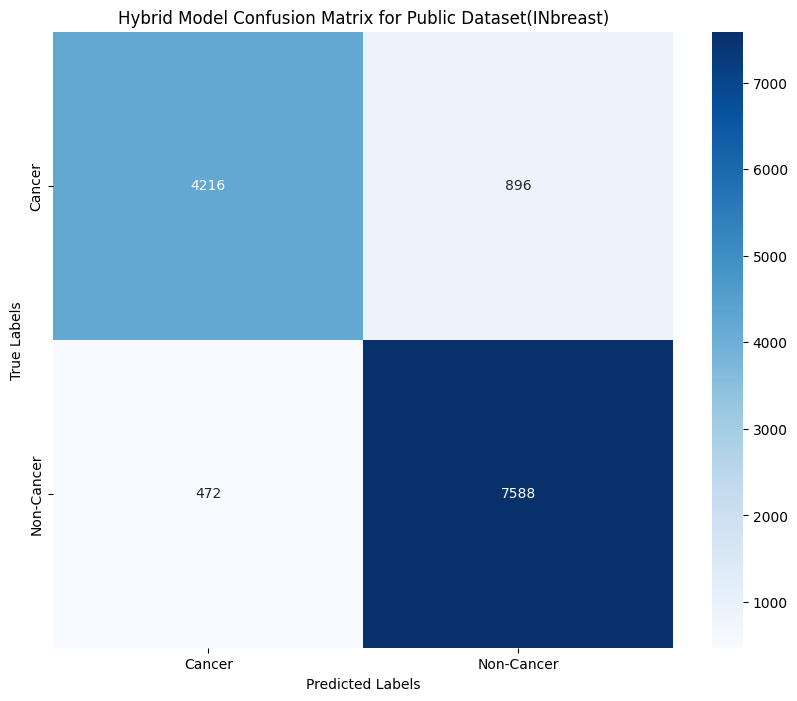

Classification Report:

              precision    recall  f1-score   support

      Cancer       0.90      0.82      0.86      5112
  Non-Cancer       0.89      0.94      0.92      8060

    accuracy                           0.90     13172
   macro avg       0.90      0.88      0.89     13172
weighted avg       0.90      0.90      0.90     13172



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

true_classes = test_dataset.classes
class_labels = list(test_dataset.class_indices.keys())

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Hybrid Model Confusion Matrix for Public Dataset(INbreast)')
plt.show()

print("Classification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [ ]:
class_accuracies = cm.diagonal() / cm.sum(axis=1)
for i, label in enumerate(cm_labels):
    print(f'Accuracy for class {label}: {class_accuracies[i] * 100:.2f}%')

Accuracy for class Cancer: 82.47%
Accuracy for class Non-Cancer: 94.14%
